<a href="https://colab.research.google.com/github/ImanSafadr/Student-Score-Prediction/blob/main/student_performace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
data=pd.read_csv('/content/student performace dataset.zip')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.shape

(6607, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
data.isna().sum().sum()

np.int64(235)

In [ ]:
data.dropna(inplace=True,axis=0)

In [ ]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
print("Number of Numerical Columns:", len(num_cols))
print("Numerical Columns:", list(num_cols))
print("\nNumber of Categorical Columns:", len(cat_cols))
print("Categorical Columns:", list(cat_cols))

Number of Numerical Columns: 7
Numerical Columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

Number of Categorical Columns: 13
Categorical Columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


<Figure size 2500x1000 with 0 Axes>

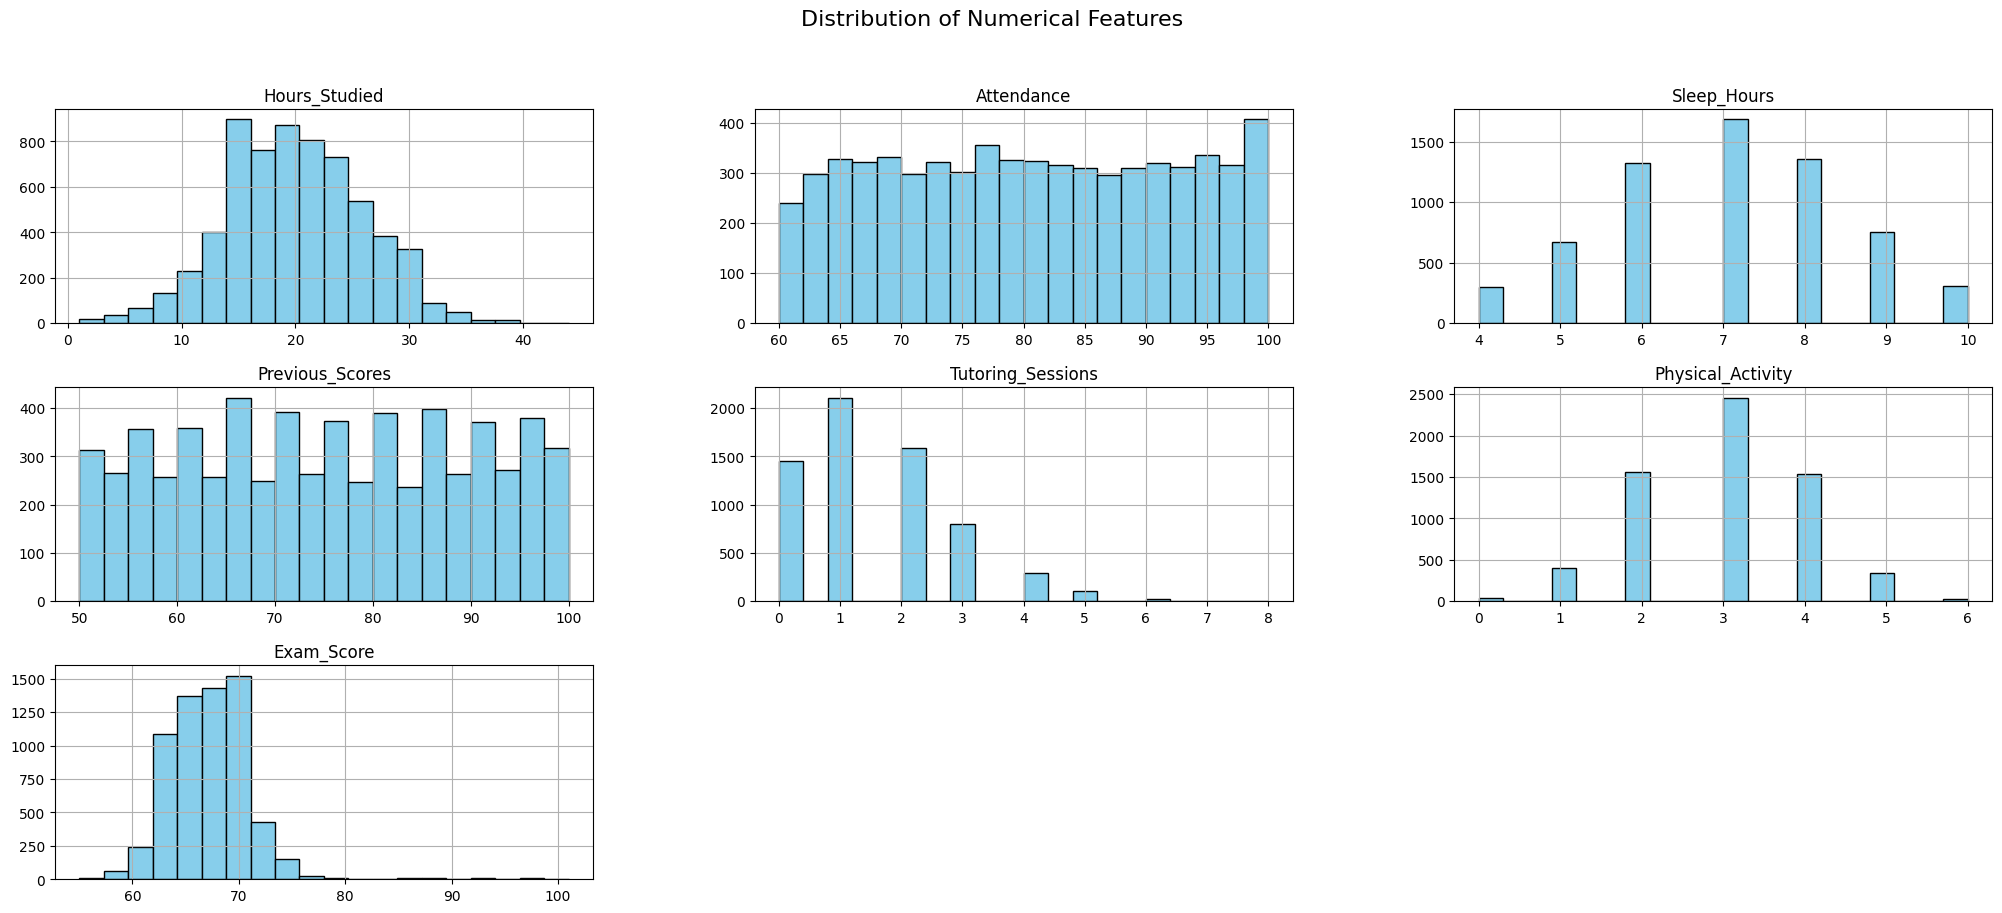

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(25, 10))
data[num_cols].hist(bins=20, figsize=(25, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


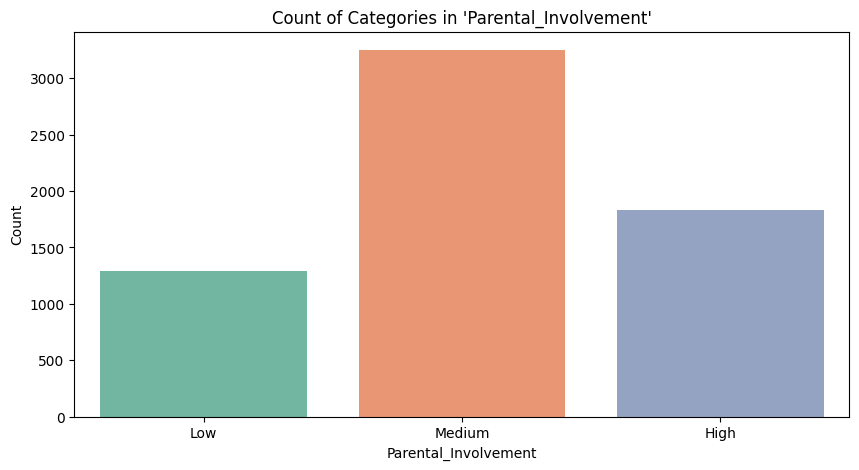

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


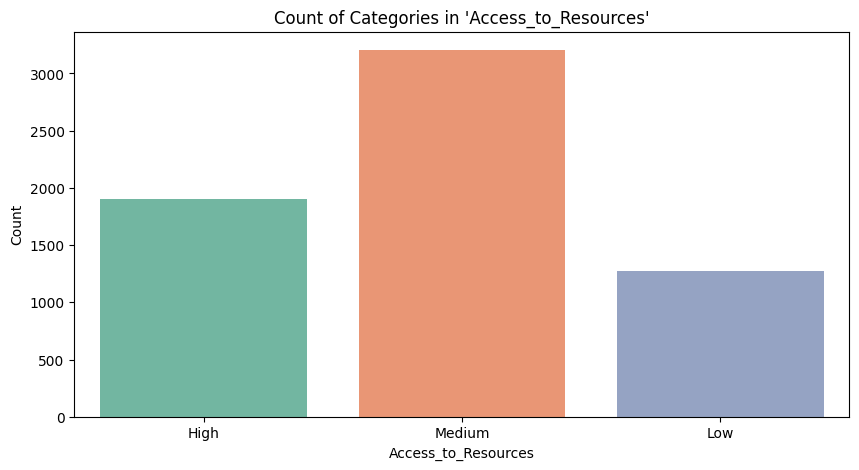

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


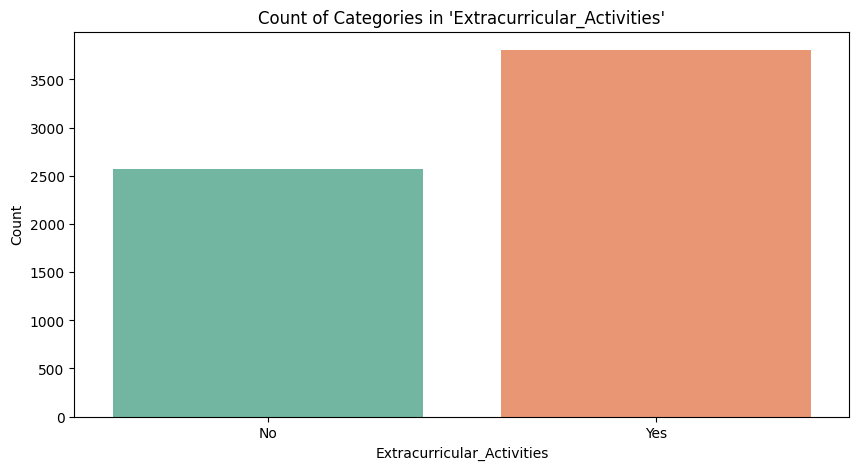

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


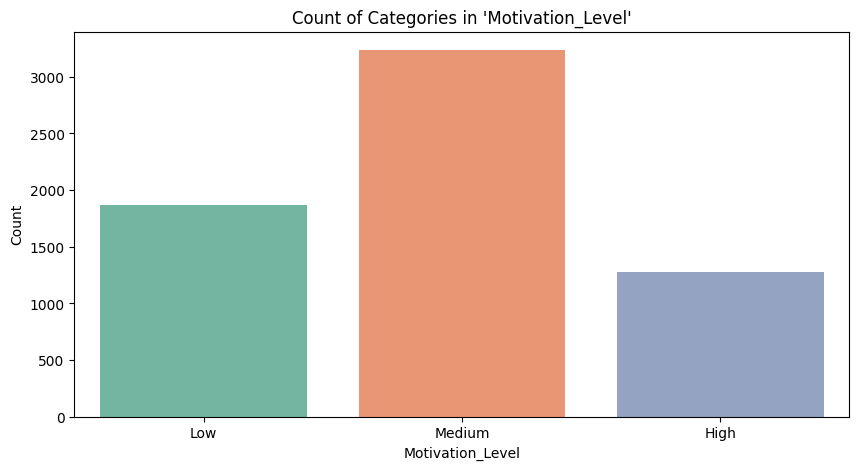

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


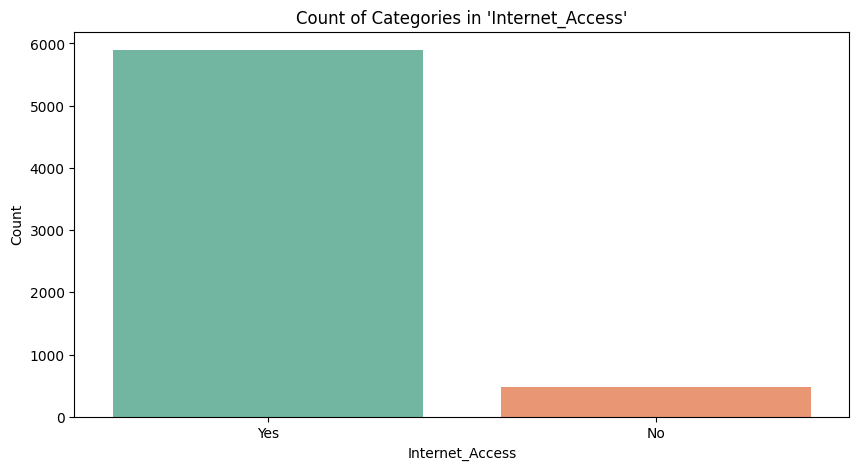

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


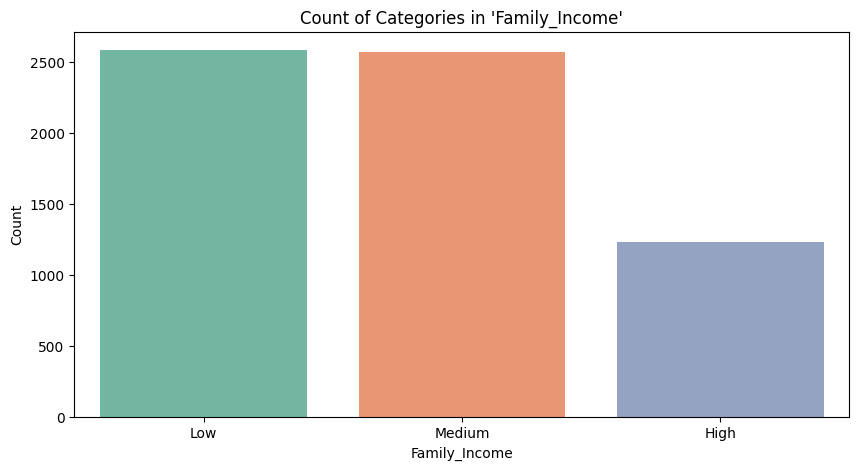

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


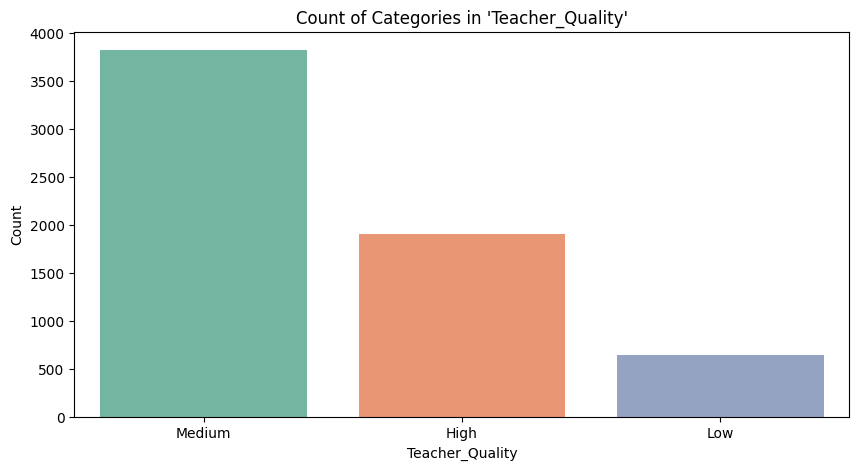

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


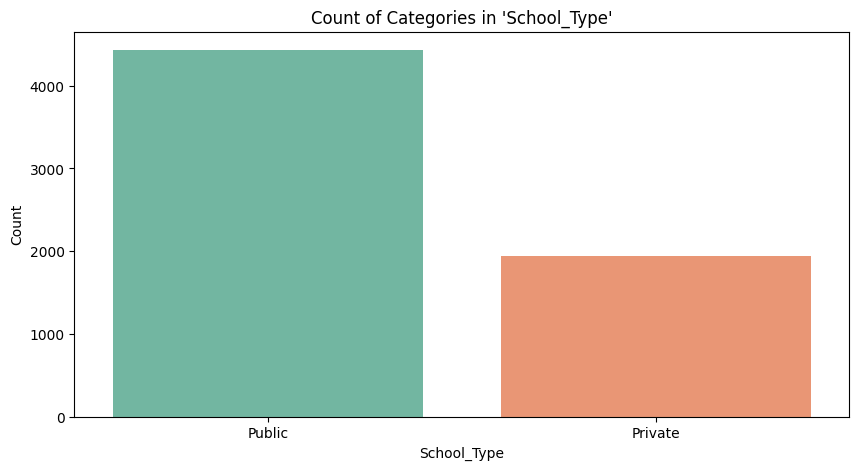

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


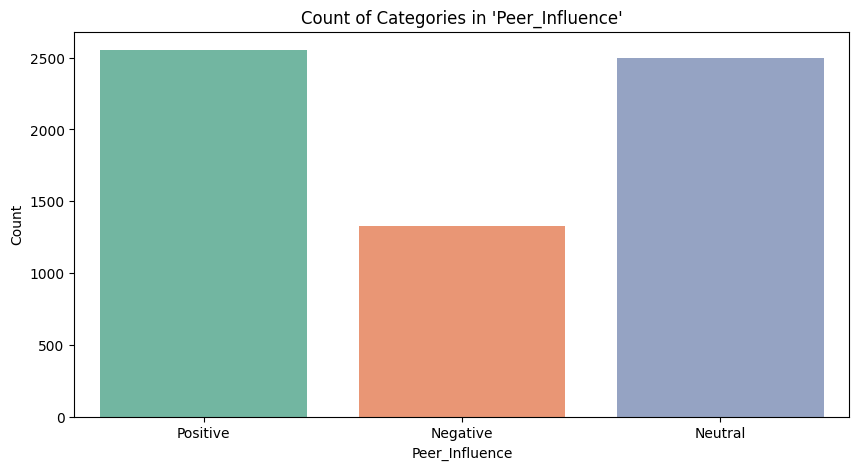

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


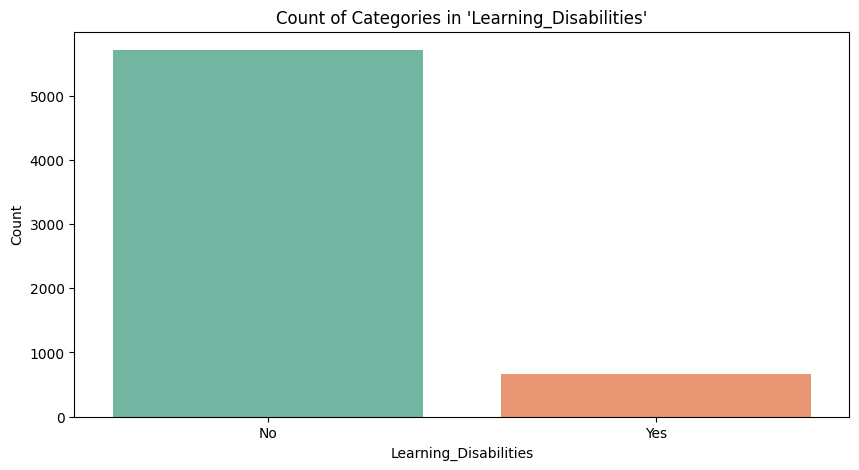

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


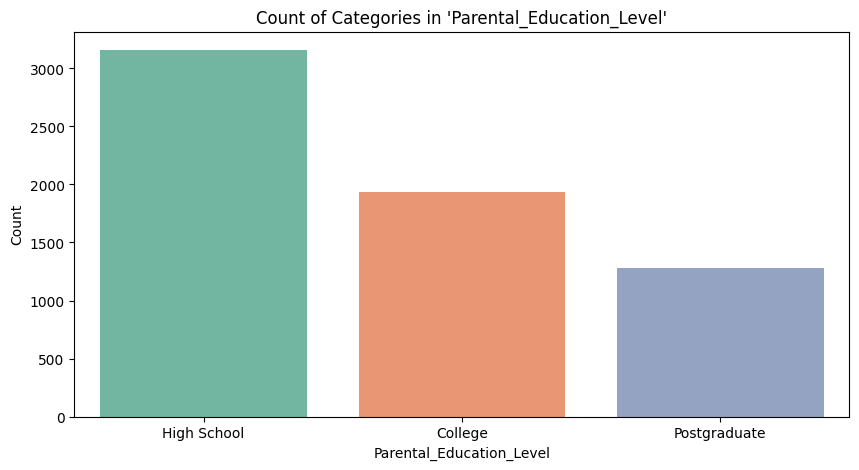

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


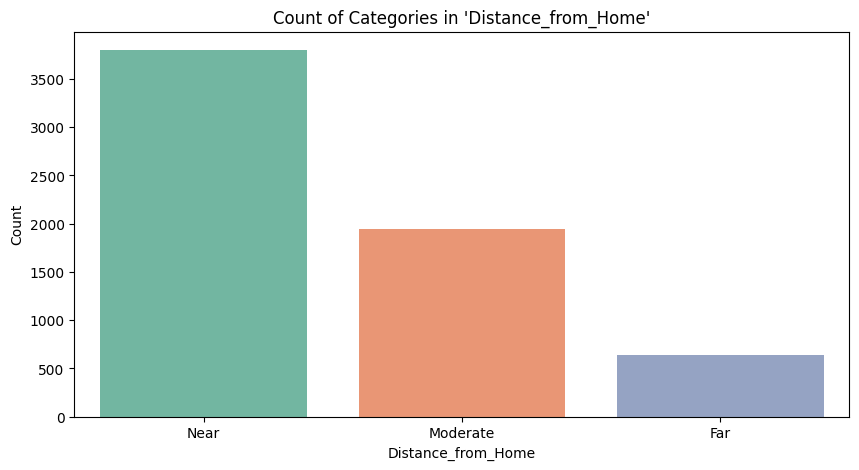

/tmp/ipython-input-724795583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=data,palette='Set2')


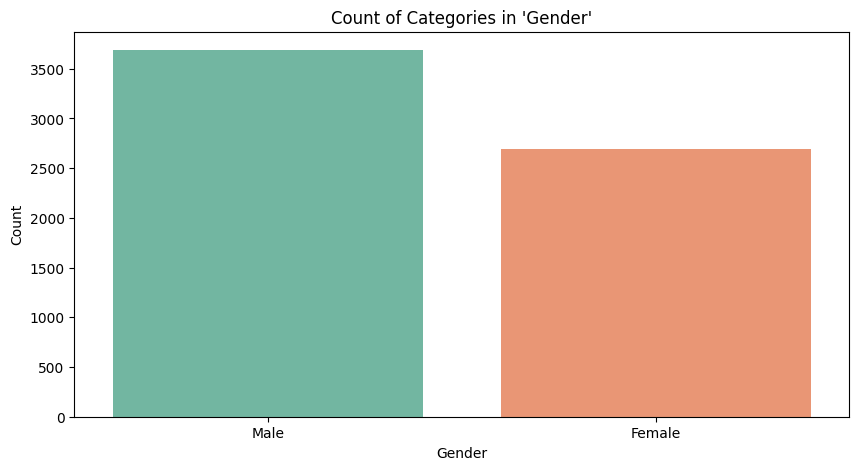

In [ ]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=data,palette='Set2')
  plt.title(f"Count of Categories in '{col}'")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


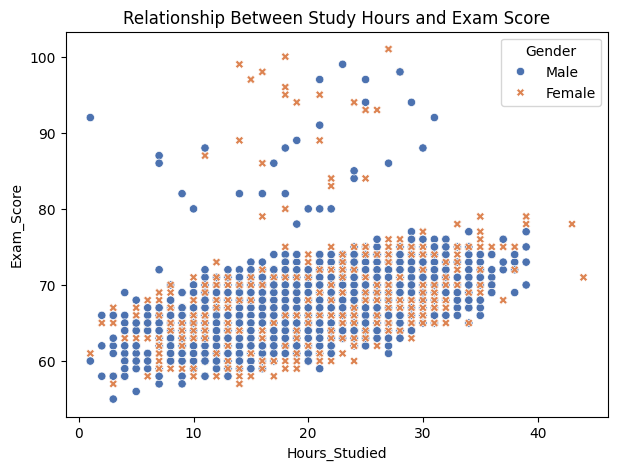

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, hue='Gender', style='Gender', palette='deep')
plt.title("Relationship Between Study Hours and Exam Score")
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.show()

In [ ]:

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
data.shape

(6378, 20)

In [ ]:

z_scores = np.abs((data - data.mean()) / data.std())
threshold = 3
data_no_outliers = data[(z_scores < threshold).all(axis=1)]


print("Removed outliers using Z-score method")
print("Original shape:", data.shape)
print("After removing outliers:", data_no_outliers.shape)

Removed outliers using Z-score method
Original shape: (6378, 20)
After removing outliers: (5802, 20)


In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0


In [ ]:
y

,Exam_Score
0,67
1,61
2,74
3,71
4,70
...,...
6602,68
6603,69
6604,68
6605,68


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
lr=model.fit(x_train,y_train)
print("Intercept:", lr.intercept_.round(2))
print("Coefficient:", lr.coef_.round(2))


Intercept: 40.16
Coefficient: [ 0.29  0.2  -0.41 -0.4   0.54 -0.02  0.05 -0.18  0.91  0.48 -0.16 -0.26
  0.01  0.52  0.18 -0.86  0.17  0.48 -0.02]


In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Absolute Error:{mae:.2f}')
print(f'Root Mean Square Error : {rmse:.2f}')

Mean Absolute Error:0.61
Root Mean Square Error : 2.10


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [ ]:
model=LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
x_train_poly.shape

(5102, 209)

In [ ]:
y_pred=model.predict(x_test_poly)

In [ ]:
y_pred = model.predict(x_test_poly)
mae_poly = metrics.mean_absolute_error(y_test, y_pred)
rmse_poly = r2_score(y_test, y_pred)

print("Polynomial Regression Model Evaluation")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"R-squared (R2): {rmse_poly:.2f}")

Polynomial Regression Model Evaluation
Mean Absolute Error (MAE): 0.61
R-squared (R2): 0.72


In [ ]:
print("Model Comparison Summary:")
if 'rmse_poly' in locals() and rmse_poly > 0:
    print(f"Polynomial Regression R²: {rmse_poly:.2f} — higher is better.")

Model Comparison Summary:
Polynomial Regression R²: 0.72 — higher is better.
